In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

# Загружаем выборку Diamonds

1. PRICE: price in US dollars (326-18,823)
2. CARAT: weight of the diamond (0.2--5.01)
3. CUT: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
4. COLOR: diamond colour, from J (worst) to D (best)
5. CLARITY: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
6. X: length in mm (0--10.74)
7. Y: width in mm (0--58.9)
8. Z: depth in mm (0--31.8)
9. DEPTH: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
10. TABLE: width of top of diamond relative to widest point (43--95)

In [3]:
diamonds_df = pd.read_csv('diamonds.csv')

In [4]:
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds_df.shape

(53940, 11)

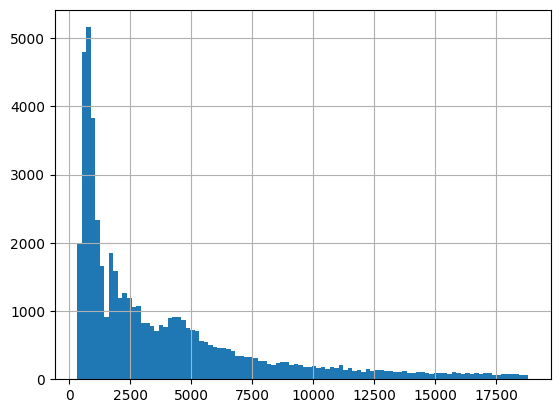

In [6]:
plt.hist(diamonds_df['price'], bins=100)
plt.grid();

# Подготовка данных

In [7]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']
target = ['price']

In [8]:
cut_transform = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
clarity_transform = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
color_transorm = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}

In [9]:
diamonds_df['cut'] = diamonds_df['cut'].apply(lambda x: cut_transform.get(x))
diamonds_df['color'] = diamonds_df['color'].apply(lambda x: color_transorm.get(x))
diamonds_df['clarity'] = diamonds_df['clarity'].apply(lambda x: clarity_transform.get(x))

In [10]:
X = diamonds_df[features].copy().values
y = diamonds_df[target].values

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.3)

# Обучаем модель линейной регрессии

In [13]:
reg = LinearRegression().fit(X_train, y_train)

In [14]:
y_pred = reg.predict(X_test)

In [15]:
score = r2_score(y_pred, y_test)

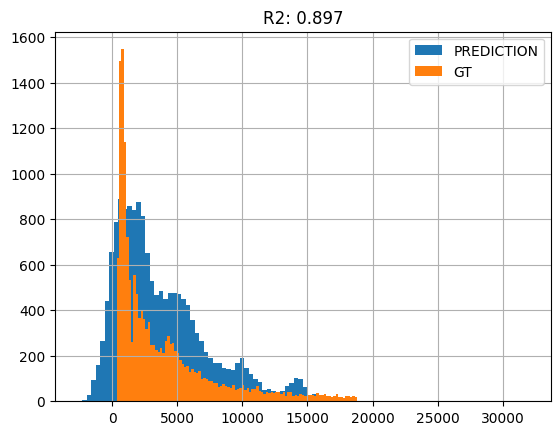

In [16]:
plt.title(f'R2: {str(score)[:5]}')
plt.hist(y_pred.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

In [17]:
X_train.shape , (37758, 100)

((37758, 9), (37758, 100))

# Создаём модель MLP для задачи регрессии

In [18]:
# y(batch, output) =  x(batch, input) * w(input, output) + bias(batch, output)

class LinearLayer:
    def __init__(
        self,
        input_size,
        output_size,
    ):
        self.input_size = input_size
        self.output_size = output_size
        # initialization by Kaiming He for ReLU
        scale = np.sqrt(2 / self.input_size)
        self.W = np.random.normal(0, scale, (self.input_size, self.output_size))

        self.b = None

    def forward(self, X):
        self.X = np.array(X)
        
        if self.b is None:
            self.b = np.zeros((X.shape[0], self.output_size))

        self.Y = self.X @ self.W + self.b
        return self.Y

    def backward(self, dLdy):
        # just in case
        dLdy = np.array(dLdy)
        # dL/db = dL/dy * dy/db = dL/dy
        self.dLdb = dLdy
        # (inp, out) = (inp ,batch) * (batch, outp)
        self.dLdw = self.X.T @ dLdy
        dLdx = dLdy @ self.W.T 
        return dLdx

    def step(self, lr):
        self.W -= lr * self.dLdw
        self.b -= lr * self.dLdb


        

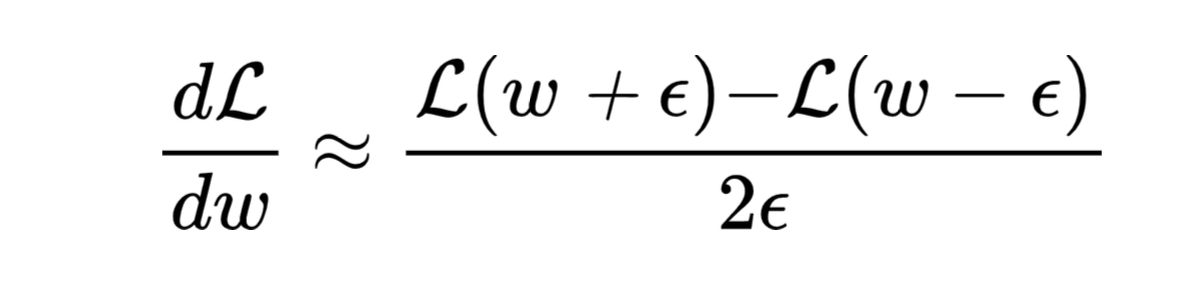

In [19]:
def calculate_gradient(function, X, eps = 1e-10):
    if len(X.shape) < 2:
        X = np.expand_dims(X, axis = -1)
        
    numerical_gradient_X = np.zeros(X.shape)
   
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            X[i,j] += eps
            f_plus = function(X)
            X[i,j] -= eps

            X[i,j] -= eps
            f_minus = function(X)
            X[i,j] += eps
            
            numerical_gradient_X[i, j] = (f_plus - f_minus) / (2*eps)
    return numerical_gradient_X

### TESTS_MY_LINEAR

In [20]:
linear = LinearLayer(10, 5)

In [21]:
# sampling
x_samples = np.random.random_sample((1, 10))
print(f"{x_samples = }", f"{x_samples.shape =}")

# test forward
y_forward = linear.forward(x_samples)
print(f"{y_forward = }")

target = np.mean(y_forward)
print(f"{target = }")

x_samples = array([[0.70173391, 0.62234927, 0.29400605, 0.70034947, 0.2256688 ,
        0.70589995, 0.34431083, 0.75524233, 0.8364403 , 0.78463068]]) x_samples.shape =(1, 10)
y_forward = array([[-1.44260411,  0.85023486, -0.07578245,  0.04297928, -0.82258471]])
target = -0.28955142369344655


In [22]:
# R^10 -> R^1
def func(W, X = x_samples, lin = linear):
    return np.mean(lin.forward(X))

In [23]:
calculate_gradient(func, linear.W)

array([[0.1403469 , 0.1403469 , 0.1403469 , 0.1403469 , 0.14034662],
       [0.12446988, 0.12447016, 0.12446988, 0.12446988, 0.12446988],
       [0.05880102, 0.05880102, 0.0588013 , 0.0588013 , 0.0588013 ],
       [0.14007018, 0.14007018, 0.1400699 , 0.1400699 , 0.1400699 ],
       [0.04513362, 0.04513362, 0.04513362, 0.04513362, 0.04513362],
       [0.14117985, 0.14117985, 0.14117985, 0.14117985, 0.14118012],
       [0.06886242, 0.06886242, 0.06886214, 0.06886242, 0.06886242],
       [0.15104806, 0.15104862, 0.15104862, 0.15104862, 0.15104862],
       [0.16728785, 0.16728841, 0.16728785, 0.16728813, 0.16728813],
       [0.15692586, 0.15692614, 0.15692614, 0.15692614, 0.15692586]])

In [24]:
# dL/dy = d(1/10 * (y1 + y2 + y3 + ...)) / dy = (1/10, 1/10, 1/10, ... )
dLdy = np.ones((1, 5)) / 5
linear.backward(dLdy)
print(linear.dLdw)

[[0.14034678 0.14034678 0.14034678 0.14034678 0.14034678]
 [0.12446985 0.12446985 0.12446985 0.12446985 0.12446985]
 [0.05880121 0.05880121 0.05880121 0.05880121 0.05880121]
 [0.14006989 0.14006989 0.14006989 0.14006989 0.14006989]
 [0.04513376 0.04513376 0.04513376 0.04513376 0.04513376]
 [0.14117999 0.14117999 0.14117999 0.14117999 0.14117999]
 [0.06886217 0.06886217 0.06886217 0.06886217 0.06886217]
 [0.15104847 0.15104847 0.15104847 0.15104847 0.15104847]
 [0.16728806 0.16728806 0.16728806 0.16728806 0.16728806]
 [0.15692614 0.15692614 0.15692614 0.15692614 0.15692614]]


In [25]:
EPS_ = 1e-5

In [26]:
 calculate_gradient(func, linear.W) - linear.dLdw < EPS_

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [27]:
calculate_gradient(func, linear.b)

array([[0.20000002, 0.20000002, 0.20000002, 0.20000002, 0.20000002]])

In [28]:
linear.dLdb

array([[0.2, 0.2, 0.2, 0.2, 0.2]])

In [29]:
calculate_gradient(func, linear.b).reshape(1, -1) - linear.dLdb < EPS_

array([[ True,  True,  True,  True,  True]])

### Численное решение и решение через градиент совпадает =)

---------------------------

In [30]:
class ReLU:
    def __init__(self):
        pass
    def forward(self, X):
        self.X = X
        self.Y = np.maximum(0, X)
        return self.Y
    def backward(self, dLdy):
        dLdx = dLdy * (self.X > 0) 
        return dLdx
    def step(self, lr):
        pass

In [31]:
relu = ReLU()

In [32]:
x_samples = np.random.randint(-5, 10, 10).reshape(10,1)
print(f'{x_samples=}')

x_samples=array([[ 3],
       [ 2],
       [ 5],
       [-4],
       [ 6],
       [-4],
       [ 9],
       [-4],
       [-3],
       [-5]])


In [33]:
relu.forward(x_samples).sum()

25

In [34]:
def f(X, relu=relu):
    return relu.forward(X).sum()

In [35]:
relu.backward(np.ones((10,1))) - calculate_gradient(f, x_samples) < EPS_

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [36]:
class MSE:
    def __init__(self):
        pass
    def forward(self, X, y):
        self.n = len(X)
        self.X = X
        self.y = y
        mse = ((self.X - self.y)**2).mean()
        return mse
    def backward(self):
        dLdx = (2*(self.X - self.y)) / self.n
        return dLdx
    def step(self):
        pass

In [37]:
# structure: 
# input -> Dense(100) -> ReLU -> Dense(1) -> MSE
class MLPRegressor:
    def __init__(
        self,
        hidden_layer_size = 100,
        learning_rate = 1e-4,
        max_iter = 15,
        batch_size = 10,
        plot = False
    ):
        self.hls = hidden_layer_size
        self.lr = learning_rate
        self.iter = max_iter
        self.batch_size = batch_size
        self.layers = []
        self.risk_function = MSE()
        self.plot = plot
                       
    def fit(self, X, y):

        size, dim = X.shape

        self.layers.append(LinearLayer(dim, self.hls))
        self.layers.append(ReLU())
        self.layers.append(LinearLayer(self.hls, 1))

        if self.plot:
            fig = plt.figure(figsize=(15, 10))
            ax = fig.add_subplot(222)
            fig.suptitle('Gradient descent')
        
        errors = []
        
        for _ in range(self.iter):
    
            batch = np.random.choice(size, self.batch_size, replace=False)
            X_batch = X[batch]
            y_batch = y[batch]

            pred = self.__forward(X_batch)

            curr_loss = self.risk_function.forward(pred, y_batch)
            errors.append(curr_loss)

            gradient_of_rf = self.risk_function.backward()
            self.__backward(gradient_of_rf)
            # update weights
            self.__step(self.lr)

        if self.plot:
            ax.plot(range(_+1), errors, 'g-')
            ax.set_title('MSE')
            ax.set_xlabel('itarations')
            
            

    def __forward(self, X):
        for l in self.layers:
            X = l.forward(X)
        return X

    def __backward(self, dLdy):
        for l in self.layers[::-1]:
            dLdy = l.backward(dLdy)

    def __step(self, learning_rate):
        for l in self.layers:
            l.step(learning_rate)

    def predict(self, X):
        predictions = []
        size, dim = X.shape
    
        num_batches = size // self.batch_size
    
        for i in range(num_batches):
            batch_start = i * self.batch_size
            batch_end = (i + 1) * self.batch_size
            batch_X = X[batch_start:batch_end]
    
            batch_predictions = self.__forward(batch_X)

            predictions.append(batch_predictions)
    
        if size % self.batch_size != 0:

            batch_X = X[num_batches * self.batch_size:]
            
            real_size = batch_X.shape[0]
            diff = self.batch_size - batch_X.shape[0]
            batch_X = np.concatenate((batch_X, np.zeros((diff, batch_X.shape[1]))), axis=0)
            
            batch_predictions = self.__forward(batch_X)
            
            predictions.append(batch_predictions[:real_size])

    
        all_predictions = np.concatenate(predictions, axis=0)
    
        return np.array(all_predictions)


# Проверяем модель MLP на выборке Diamonds

In [181]:
model = MLPRegressor(max_iter=2000, plot=True, batch_size=100, learning_rate=1e-5, hidden_layer_size=64)

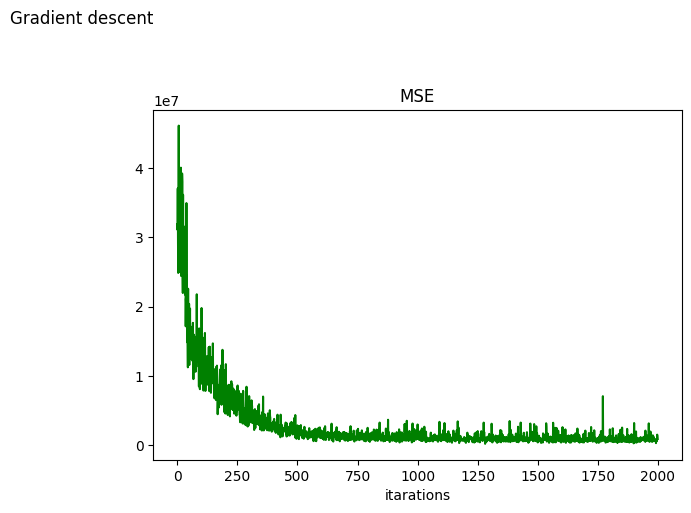

In [182]:
model.fit(X_train, y_train)

In [183]:
y_pred_nn = model.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error

In [184]:
mean_squared_error(y_pred_nn, y_test)

999367.639510793

In [186]:
score_nn = r2_score(y_pred_nn, y_test)
score_nn

0.9346941356285711

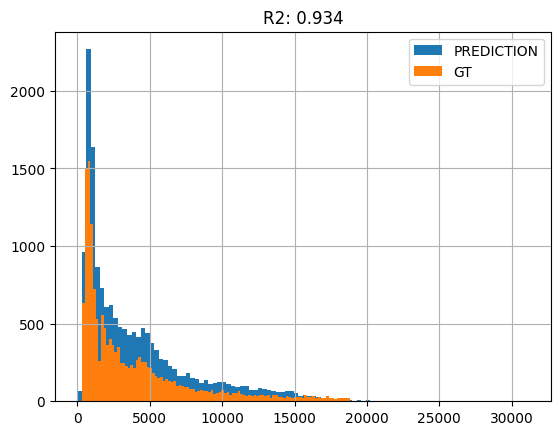

In [187]:
plt.title(f'R2: {str(score_nn)[:5]}')
plt.hist(y_pred_nn.reshape(1, -1)[0], bins=100, label='PREDICTION')
plt.hist(y_test.reshape(1, -1)[0], bins=100, label='GT')
plt.legend()
plt.grid();

## R2 скор лучше)))))))